In [21]:
import pandas as pd
import json

In [22]:
knowledge_path = "../data/knowledge/conceptnet.csv"
train_question_path = "../data/csqa2/train.json"
dev_question_path = "../data/csqa2/dev.json"
test_question_path = "../data/csqa2/test.json"

In [46]:
cpt = pd.read_csv(knowledge_path, sep='\t', header=None)
cpt.columns = ['relation', 'start', 'end']

with open(train_question_path, 'r') as f:
    train_questions = [json.loads(l) for l in f]
    
with open(dev_question_path, 'r') as f:
    dev_questions = [json.loads(l) for l in f]
    
with open(test_question_path, 'r') as f:
    test_questions = [json.loads(l) for l in f]

In [47]:
train_questions[:3]

[{'id': '0000488c294c99bd1a6cf10258dae8c1',
  'question': 'The world trade center is no more because of 9/11?',
  'answer': 'yes',
  'confidence': 0.89,
  'date': '12/16/2020',
  'relational_prompt': 'because',
  'topic_prompt': 'world trade center',
  'relational_prompt_used': True,
  'topic_prompt_used': True,
  'validations': ['yes', 'yes', 'yes', 'no']},
 {'id': '0007ec77ec8db1d0b9f4e72fd1a931c5',
  'question': 'a pupil can be either a student or part of an eye',
  'answer': 'yes',
  'confidence': 0.98,
  'date': '2/12/2021',
  'relational_prompt': 'sometimes',
  'topic_prompt': 'pupil',
  'relational_prompt_used': False,
  'topic_prompt_used': True,
  'validations': ['yes', 'yes']},
 {'id': '000a24f0db61226f9a4a744960a16104',
  'question': 'Unity has a lot to do with family.',
  'answer': 'yes',
  'confidence': 0.71,
  'date': '4/7/2021',
  'relational_prompt': 'has',
  'topic_prompt': 'unity',
  'relational_prompt_used': True,
  'topic_prompt_used': True,
  'validations': ['yes',

In [56]:
cpt_cnt = cpt.groupby('start').count()['relation']
cpt_cnt

start
0                    14
0.22_inch_calibre     1
000                   5
007                   4
007s                  1
                     ..
𐑑                     1
𐑓                     1
𐑝                     1
𐑞                     1
🍕                     1
Name: relation, Length: 935409, dtype: int64

In [84]:
def prompt_knowledge_cnt(question, knowledge):
    prompt = list(set(['_'.join(q['topic_prompt'].split(' ')) for q in question]))
    cnt = [knowledge[p] if p in knowledge else 0 for p in prompt]
    cnt.sort()
    return cnt


test_cnt = prompt_knowledge_cnt(test_questions, cpt_cnt)
dev_cnt = prompt_knowledge_cnt(dev_questions, cpt_cnt)
train_cnt = prompt_knowledge_cnt(train_questions, cpt_cnt)



In [82]:
import matplotlib.pyplot as plt

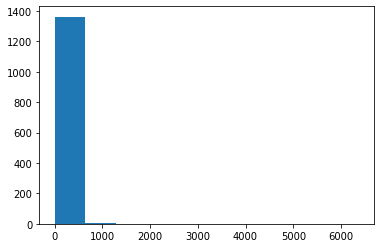

,0
count,1369.000000
mean,104.039445
std,206.814710
min,0.000000
25%,27.000000
50%,60.000000
75%,127.000000
max,6378.000000


In [87]:
plt.hist(train_cnt)
plt.show()
pd.DataFrame(train_cnt).describe()

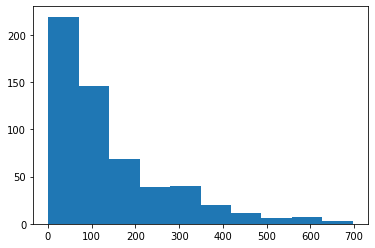

,0
count,559.000000
mean,139.386404
std,133.107070
min,1.000000
25%,40.500000
50%,98.000000
75%,187.500000
max,697.000000


In [88]:
plt.hist(dev_cnt)
plt.show()
pd.DataFrame(dev_cnt).describe()

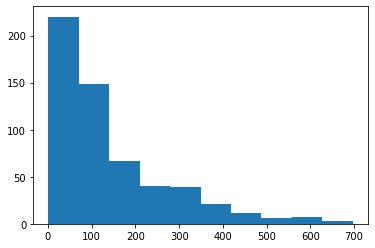

,0
count,562.000000
mean,139.259786
std,133.193787
min,1.000000
25%,40.250000
50%,98.000000
75%,187.750000
max,697.000000


In [89]:
plt.hist(test_cnt)
plt.show()
pd.DataFrame(test_cnt).describe()

In [64]:
cpt_cnt['famous']

104

In [71]:
for i in train_questions:
    if i['topic_prompt'] == 'smaller than':
        print(i)

{'id': '3893e89a3eb808568eeade04423fbef4', 'question': 'Only a few people are smaller than barack obama', 'answer': 'no', 'confidence': 0.99, 'date': '1/25/2021', 'relational_prompt': 'few', 'topic_prompt': 'smaller than', 'relational_prompt_used': True, 'topic_prompt_used': True, 'validations': ['no', 'no', 'no']}
{'id': '47dd7f276a82af792385fbdc96ad3c43', 'question': 'If a can is smaller than a bottle it will hold less?', 'answer': 'yes', 'confidence': 0.66, 'date': '2/3/2021', 'relational_prompt': 'can', 'topic_prompt': 'smaller than', 'relational_prompt_used': True, 'topic_prompt_used': True, 'validations': ['yes', 'bad question']}
